# Number Prediction on MNIST dataset with CNN


1.  Here i have already clean the data and used for model evaluation
2.  Here in Sequential model we apply CNN arcitecture NN model.




In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Already cleaned Data, i just need to load to memory

In [0]:
import pickle
X_train=pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cleanData_1To9/X_train.pickle","rb"))
Y_train=pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cleanData_1To9/Y_train.pickle","rb"))

In [0]:
X_train.shape,Y_train.shape,len(X_train),len(Y_train)

((42000, 28, 28, 1), (42000, 10), 42000, 42000)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

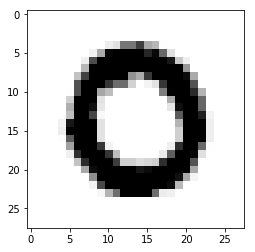

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 1, dtype: uint8

In [0]:
plt.imshow(np.squeeze(X_train[1]),cmap="binary")
plt.show()
Y_train.iloc[1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=2)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Activation,Dense
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

W0827 02:25:12.783696 140088150472576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

Using TensorFlow backend.


In [0]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 20, 
         validation_data = (X_val, Y_val), verbose = 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 - 137s - loss: 0.2566 - acc: 0.9173 - val_loss: 0.0831 - val_acc: 0.9742
Epoch 2/20
33600/33600 - 136s - loss: 0.0795 - acc: 0.9765 - val_loss: 0.0481 - val_acc: 0.9857
Epoch 3/20
33600/33600 - 136s - loss: 0.0583 - acc: 0.9819 - val_loss: 0.0425 - val_acc: 0.9861
Epoch 4/20
33600/33600 - 137s - loss: 0.0484 - acc: 0.9855 - val_loss: 0.0551 - val_acc: 0.9850
Epoch 5/20
33600/33600 - 136s - loss: 0.0426 - acc: 0.9875 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 6/20
33600/33600 - 136s - loss: 0.0381 - acc: 0.9885 - val_loss: 0.0353 - val_acc: 0.9904
Epoch 7/20
33600/33600 - 136s - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0308 - val_acc: 0.9902
Epoch 8/20
33600/33600 - 136s - loss: 0.0323 - acc: 0.9911 - val_loss: 0.0317 - val_acc: 0.9908
Epoch 9/20
33600/33600 - 136s - loss: 0.0300 - acc: 0.9907 - val_loss: 0.0405 - val_acc: 0.9898
Epoch 10/20
33600/33600 - 136s - loss: 0.0267 - acc: 0.9920 - val_loss: 0.0306 - val_ac

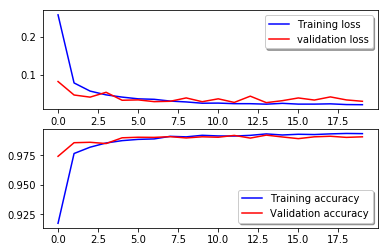

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
import pandas as pd
# predict results
results = model.predict(X_train)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

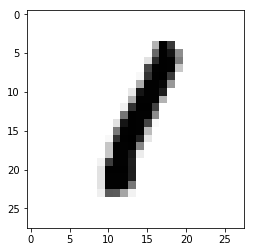

In [0]:
plt.imshow(np.squeeze(X_train[666]),cmap="binary")
plt.show()

In [50]:
predict = model.predict([X_val])
predict, predict.shape

(array([[4.58015787e-13, 2.78107273e-19, 1.15881618e-17, ...,
         1.84311709e-22, 1.41175015e-14, 2.52650523e-17],
        [1.71573189e-09, 1.19149874e-07, 2.30276123e-06, ...,
         6.38045080e-04, 4.61645686e-04, 9.84999597e-01],
        [3.61895323e-18, 6.13385129e-17, 2.23122173e-19, ...,
         8.63060399e-17, 4.64087861e-13, 2.65386411e-12],
        ...,
        [6.25105236e-20, 9.46955838e-13, 5.28568109e-14, ...,
         5.19105314e-11, 6.92960636e-14, 7.00612714e-15],
        [2.13585191e-11, 1.69394742e-15, 6.61779642e-16, ...,
         2.44368462e-19, 4.29385694e-12, 2.20976960e-16],
        [1.81251298e-08, 1.22465682e-08, 7.18893389e-08, ...,
         1.66987991e-06, 6.74176317e-06, 9.99768555e-01]], dtype=float32),
 (8400, 10))

In [53]:
np.argmax(predict[6666])

9

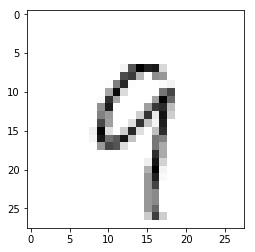

In [55]:
plt.imshow(np.squeeze(X_val[6666]),cmap="binary")
plt.show()